In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import snap

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy  import cophenet
from scipy.spatial.distance import pdist
from  scipy.cluster.hierarchy  import fcluster

%matplotlib inline

In [2]:
# data import
features = pd.read_csv('data/test-3/hashtag_network.emb', sep=' ',header=None,skiprows=1)
nodes = pd.read_csv('data/test-3/hashtag_network_nodes.csv', sep='\t')

/home/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = nodes.merge(features, left_on='id', right_on=0)

In [4]:
tags = data[data['type'] == 'tag']
tags.drop(['type',0], axis=1, inplace=True)

/home/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
tags.shape

(1692, 11)

In [6]:
# generate the linkage matrix (should try other metrics other than ward)
for metric in ['single','complete','average','weighted','centroid','median','ward']:
    Z = linkage(tags[range(1,9)], metric)
    c, coph_dists = cophenet(Z, pdist(tags[range(1,9)]))
    print metric, c

single 0.6090862319387184
complete 0.7390778831152555
average 0.7610371223209264
weighted 0.6442074982162309
centroid 0.7838233104218091
median 0.6200758600780909
ward 0.47381061147271963


In [7]:
# the most c reaches 1, the better is the clustering
Z = linkage(tags[range(1,9)], 'centroid')
c, coph_dists = cophenet(Z, pdist(tags[range(1,9)]))
print c

0.7838233104218091


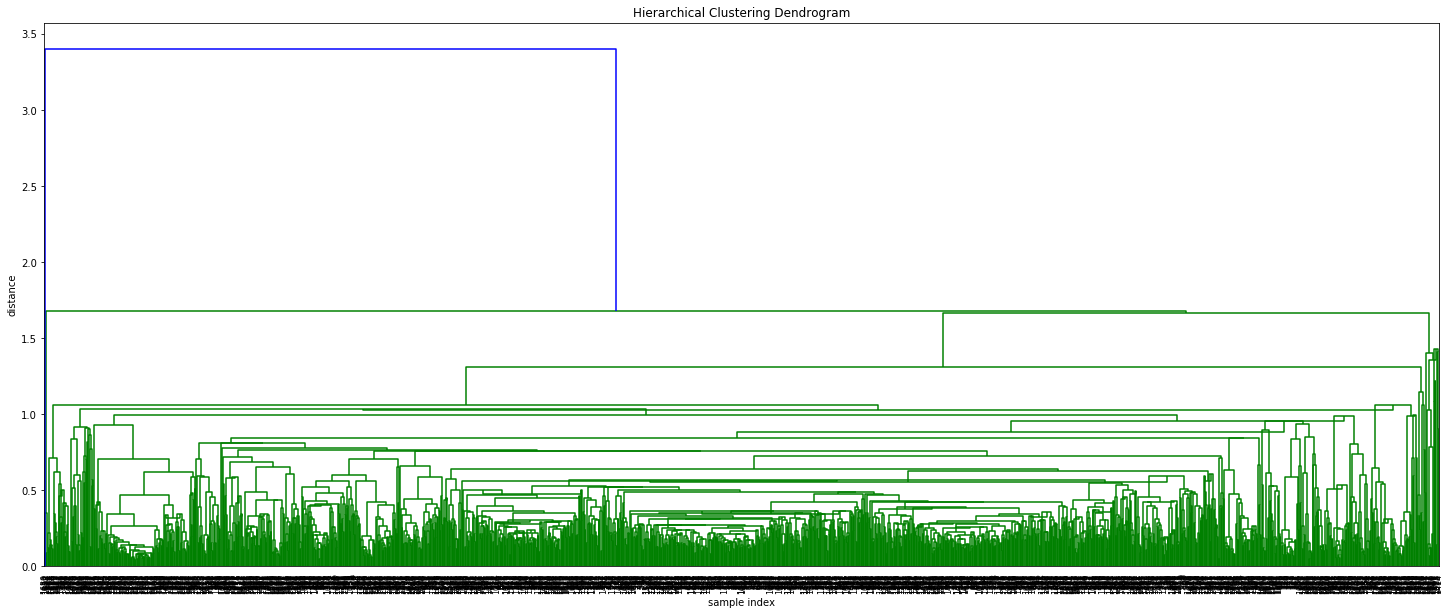

In [8]:
# calculate full dendrogram 
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

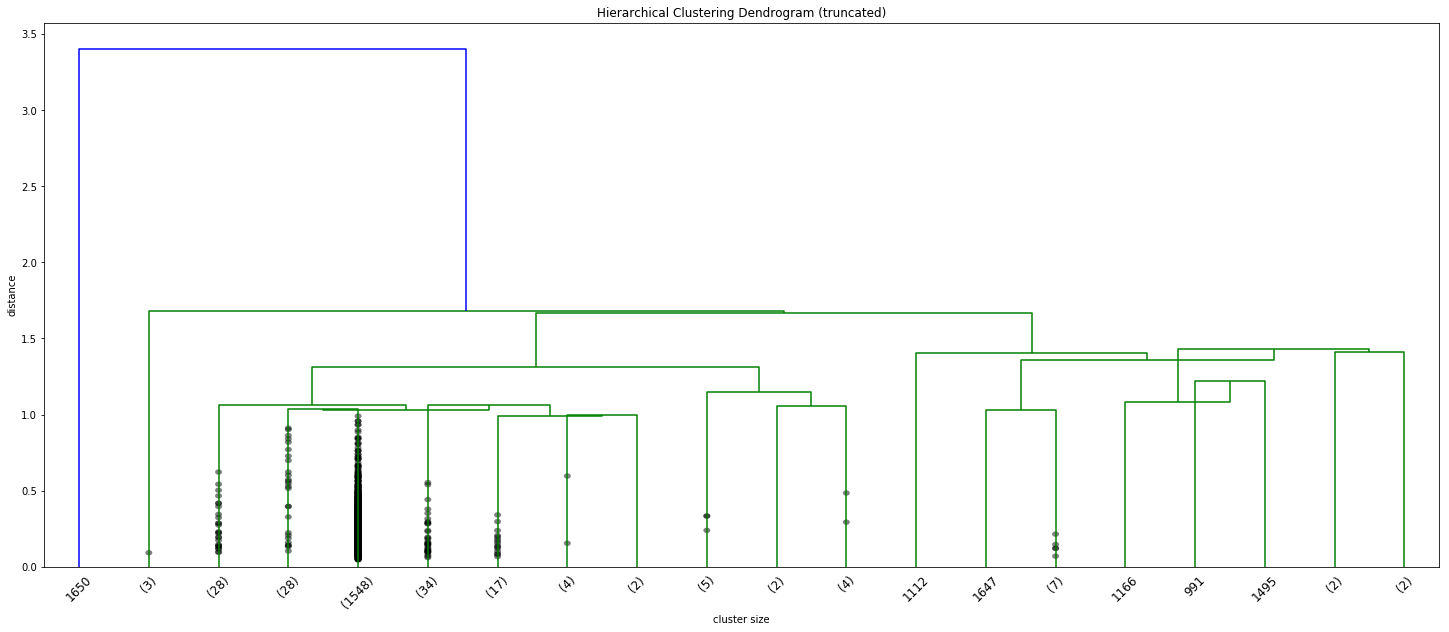

In [10]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster size')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=45.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [13]:
# cluster extraction
n_clusters = 20
labels = fcluster(Z, n_clusters, criterion='maxclust')

In [14]:
tags['cluster'] = labels

/home/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
for c in range(n_clusters):
    t = tags[tags['cluster'] == c]
    
    print c, t.shape[0]
    print ','.join(list(t['content'][:20]))

0 0

1 3
andalucia,fincacortesin,thepreferredlife
2 28
bedtime,sleeptight,goodnight,sleep,gutenmorgen,buongiorno,buonanotte,buenasnoches,bonnenuit,gutenacht,wakeup,cat,bookstagram,newengland,sweetdreams,goodmorningworld,writing,writer,nightynight,writersofinstagram
3 28
madebyhand,lesirenusemiami,lucca,wedding,handmadejewelry,falierosarti,casamento,emotion,weddingplanner,onefirebeach,francosbar,verytandc,handlettering,lettering,cerimonial,cerimonialista,noiva,typography,designspiration,divinasecrets
4 1548
australianbrand,wanderlust,turquoise,colour,lifestyle,lifestylebrand,winetime,sydney,weekendstyle,newyork,newyorkcity,earrings,keychain,saturdaynight,silk,weekendvibes,friyay,necklace,jewellery,accessories
5 34
wool,amore,toscana,modern,styling,yoga,tuscany,bridge,goodlife,firenze,italiansdoitbetter,instadesign,malibu,primavera,vegan,fairtrade,rug,meditation,traveldiary,yogajournal
6 17
in,international,luxuryhomes,luxuryrealestate,villas,waterfront,luxuryproperties,realtor,listing,l